In [ ]:
pip install sklearn

In [1]:
import pandas as pd
import numpy as np
import psycopg2
import psycopg2.extras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "postgres",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [3]:
con = PostgresConnection().getConnection()

successfully connected to database


In [4]:
cur = con.cursor()
st = '''select  t.year,t.month ,i.item_key, sum(ft.total_price) 
               from ecomdb_star_schema.fact_table ft 
               join ecomdb_star_schema.time_dim t on t.time_key = ft.time_key
               join ecomdb_star_schema.item_dim i on i.item_key = ft.item_key
               group by (i.item_key,t.year,t.month)
               order by (i.item_key,t.year,t.month) '''
cur.execute(st)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['year', 'month' ,'item_id','total_sales'])
#df.head()
df.dropna()

,year,month,item_id,total_sales
0,2014,1,I00001,1518.0
1,2014,2,I00001,2794.5
2,2014,3,I00001,2921.0
3,2014,4,I00001,3737.5
4,2014,5,I00001,2679.5
...,...,...,...,...
22435,2020,9,I00264,4155.0
22436,2020,10,I00264,6315.0
22437,2020,11,I00264,2910.0
22438,2020,12,I00264,6390.0


In [5]:
df2=df
b=df.copy()
c=df.copy()
d=df.copy()
e=df.copy()
#df=df.values

In [6]:
b['month'] = b['month'].replace(1, 'January')
b['month'] = b['month'].replace(2, 'February')
b['month'] = b['month'].replace(3, 'March')
b['month'] = b['month'].replace(4, 'April')
b['month'] = b['month'].replace(5, 'May')
b['month'] = b['month'].replace(6, 'June')
b['month'] = b['month'].replace(7, 'July')
b['month'] = b['month'].replace(8, 'August')
b['month'] = b['month'].replace(9, 'September')
b['month'] = b['month'].replace(10, 'October')
b['month'] = b['month'].replace(11, 'November')
b['month'] = b['month'].replace(12, 'December')

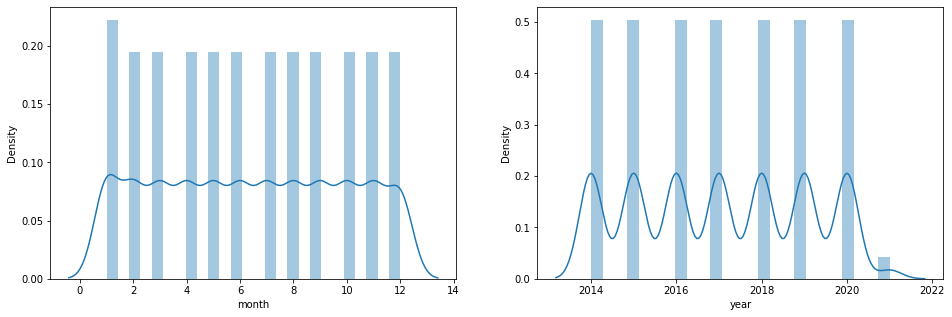

In [7]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(c['month'])
plt.subplot(1,2,2)
sns.distplot(b['year'])
plt.show()

<AxesSubplot:xlabel='month', ylabel='count'>

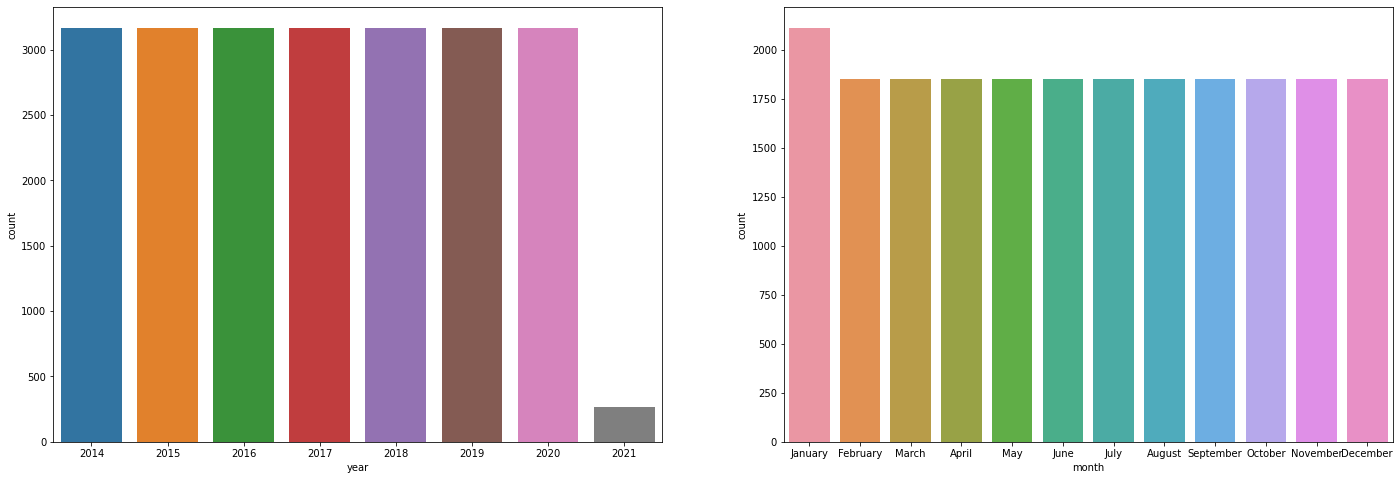

In [8]:
plt.figure(figsize = (24,8))
plt.subplot(1,2,1)
sns.countplot(x=b['year'])
plt.subplot(1,2,2)
sns.countplot(x=b['month'])

# Data Pre Processing

# Checking for null value

In [9]:
df.isnull().sum()

year           0
month          0
item_id        0
total_sales    0
dtype: int64

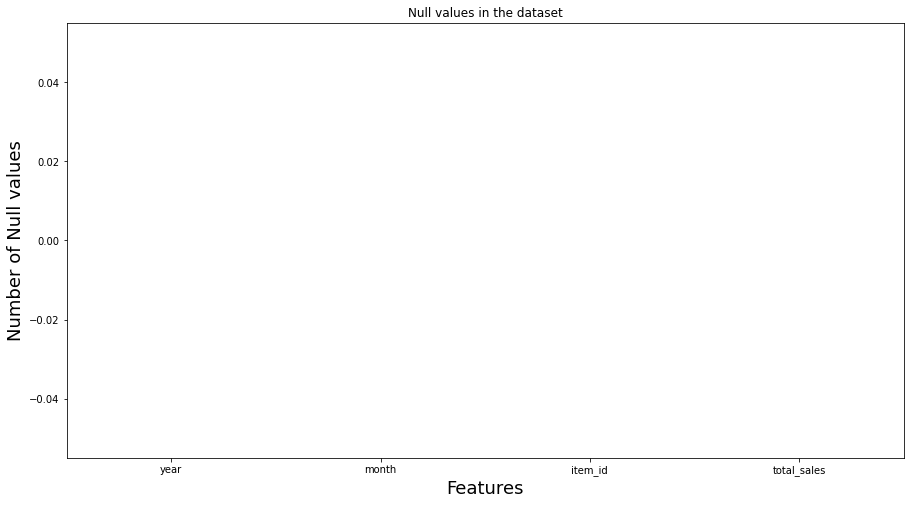

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

null_value = df.isnull()
plt.figure(figsize = (15,8))
sns.barplot(data=null_value)
plt.xlabel('Features',fontsize=18)
plt.ylabel('Number of Null values',fontsize=18)
plt.title("Null values in the dataset")
plt.savefig('Checking for null values')

plt.show()

# ORDINAL ENCODING

In [11]:
oencoder = OrdinalEncoder()
df['year']=oencoder.fit_transform(df["year"].to_numpy().reshape(-1, 1))
df['month']=oencoder.fit_transform(df["month"].to_numpy().reshape(-1, 1))

In [12]:
df

,year,month,item_id,total_sales
0,0.0,0.0,I00001,1518.0
1,0.0,1.0,I00001,2794.5
2,0.0,2.0,I00001,2921.0
3,0.0,3.0,I00001,3737.5
4,0.0,4.0,I00001,2679.5
...,...,...,...,...
22435,6.0,8.0,I00264,4155.0
22436,6.0,9.0,I00264,6315.0
22437,6.0,10.0,I00264,2910.0
22438,6.0,11.0,I00264,6390.0


# ONE HOT ENCODING

In [13]:
newdf = df
newdf=newdf.iloc[:,:-1]
newdf
newdf=pd.get_dummies(newdf,columns = ['item_id'])

In [14]:
newdf

,year,month,item_id_I00001,item_id_I00002,item_id_I00003,item_id_I00004,item_id_I00005,item_id_I00006,item_id_I00007,item_id_I00008,...,item_id_I00255,item_id_I00256,item_id_I00257,item_id_I00258,item_id_I00259,item_id_I00260,item_id_I00261,item_id_I00262,item_id_I00263,item_id_I00264
0,0.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,3.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,4.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22435,6.0,8.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22436,6.0,9.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22437,6.0,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22438,6.0,11.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
newdf.dtypes

year              float64
month             float64
item_id_I00001      uint8
item_id_I00002      uint8
item_id_I00003      uint8
                   ...   
item_id_I00260      uint8
item_id_I00261      uint8
item_id_I00262      uint8
item_id_I00263      uint8
item_id_I00264      uint8
Length: 266, dtype: object

In [16]:
df3=df2
# checking features
cat = newdf.select_dtypes(include='O').keys()
# display variabels
cat

Index([], dtype='object')

In [18]:
# unique values in each columns
for x in newdf.columns:
    #prinfting unique values
    print(x ,':', len(newdf[x].unique()))

year : 8
month : 12
item_id_I00001 : 2
item_id_I00002 : 2
item_id_I00003 : 2
item_id_I00004 : 2
item_id_I00005 : 2
item_id_I00006 : 2
item_id_I00007 : 2
item_id_I00008 : 2
item_id_I00009 : 2
item_id_I00010 : 2
item_id_I00011 : 2
item_id_I00012 : 2
item_id_I00013 : 2
item_id_I00014 : 2
item_id_I00015 : 2
item_id_I00016 : 2
item_id_I00017 : 2
item_id_I00018 : 2
item_id_I00019 : 2
item_id_I00020 : 2
item_id_I00021 : 2
item_id_I00022 : 2
item_id_I00023 : 2
item_id_I00024 : 2
item_id_I00025 : 2
item_id_I00026 : 2
item_id_I00027 : 2
item_id_I00028 : 2
item_id_I00029 : 2
item_id_I00030 : 2
item_id_I00031 : 2
item_id_I00032 : 2
item_id_I00033 : 2
item_id_I00034 : 2
item_id_I00035 : 2
item_id_I00036 : 2
item_id_I00037 : 2
item_id_I00038 : 2
item_id_I00039 : 2
item_id_I00040 : 2
item_id_I00041 : 2
item_id_I00042 : 2
item_id_I00043 : 2
item_id_I00044 : 2
item_id_I00045 : 2
item_id_I00046 : 2
item_id_I00047 : 2
item_id_I00048 : 2
item_id_I00049 : 2
item_id_I00050 : 2
item_id_I00051 : 2
item_id_I00

In [19]:
X=newdf
y = df.iloc[:,-1]

In [20]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 10)

# Linear Regression

In [21]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2: ', r2)

Intercept: 4472.857972232503
Root mean squared error:  1042750.4675026748
R2:  0.8476532159593491


In [28]:
regression_model.score(X_test,y_test)

0.8476532159593491

In [ ]:
SVR

In [25]:
from sklearn import svm
regr = svm.SVR(kernel="linear", C=100, gamma="auto")
regr.fit(X_train, y_train)
# Predict
y_predicted = regr.predict(X_test)

In [26]:
# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Intercept:', regr.intercept_)
print('Root mean squared error: ', rmse)
print('R2: ', r2)

Intercept: [4423.19579319]
Root mean squared error:  1603183.5664914402
R2:  0.7657734345909889


In [27]:
regr.score(X_test,y_test)

0.7657734345909889

In [ ]:
newdf=df.iloc[:,:-1]
newdf=pd.get_dummies(newdf,columns = ['item_id','month','year'])

In [ ]:
newdf

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 10)

In [ ]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2: ', r2)

In [ ]:
regression_model.score(X_test,y_test)

In [ ]:
y_predicted = regr.predict(X_test)

In [ ]:
regr.score(X_test,y_test)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), svm.SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

In [ ]:
y_predicted = regr.predict(X_test)

In [ ]:
# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
#print('Intercept:', regr.intercept_)
print('Root mean squared error: ', rmse)
print('R2: ', r2)

In [ ]:
regr.score(X_test,y_test)

In [ ]:
df=data

In [ ]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)
# summarize the transformed data
print('Input', X.shape)
print(X)

In [ ]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
print(y_train.shape)

In [ ]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

In [ ]:
# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)

In [ ]:
plt.scatter(X_train, y_train)

In [ ]:
print(X_train.size)